###### Logestic Regression

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
Data= pd.read_csv('nba_2017_br.csv')
Data.head(5)

,Player,Pos,Age,G,GS,MP,FG,FGA
0,Russell Westbrook,PG,28,81,81,34.6,10.2,24.0
1,James Harden,PG,27,81,81,36.4,8.3,18.9
2,Isaiah Thomas,PG,27,76,76,33.8,9.0,19.4
3,Anthony Davis,C,23,75,75,36.1,10.3,20.3
4,DeMar DeRozan,SG,27,74,74,35.4,9.7,20.9


In [3]:
Data.groupby('FGA').mean()

,Age,G,GS,MP,FG
FGA,,,,,
0.0,23.0,1.0,0.0,1.0,0.0
0.3,23.0,3.0,0.0,3.0,0.0
0.5,26.0,5.0,0.0,3.5,0.4
0.8,28.0,7.8,0.0,3.6,0.3
0.9,33.0,8.0,0.0,2.8,0.3
...,...,...,...,...,...
19.8,26.0,75.0,75.0,35.9,8.8
19.9,26.0,72.0,72.0,34.2,9.0
20.3,23.0,75.0,75.0,36.1,10.3


<AxesSubplot:xlabel='Age'>

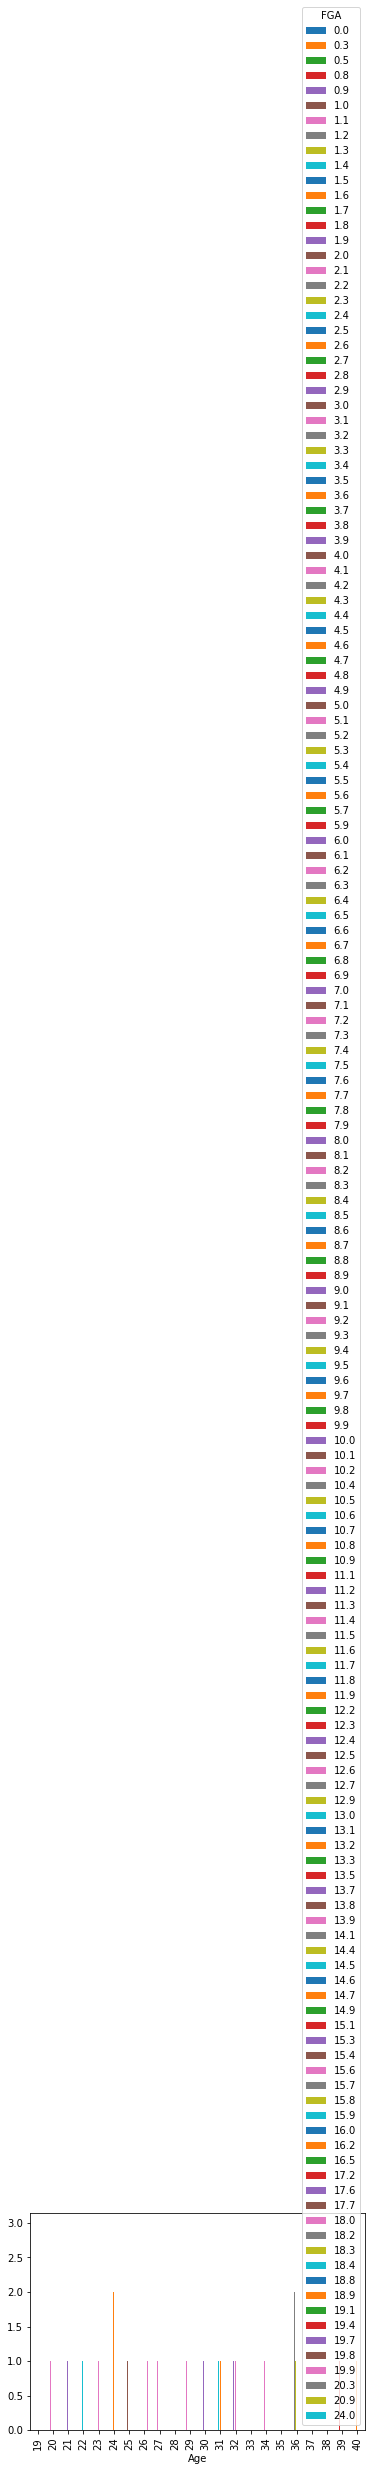

In [4]:
pd.crosstab(Data.Age,Data.FGA).plot(kind='bar')

<AxesSubplot:xlabel='FG'>

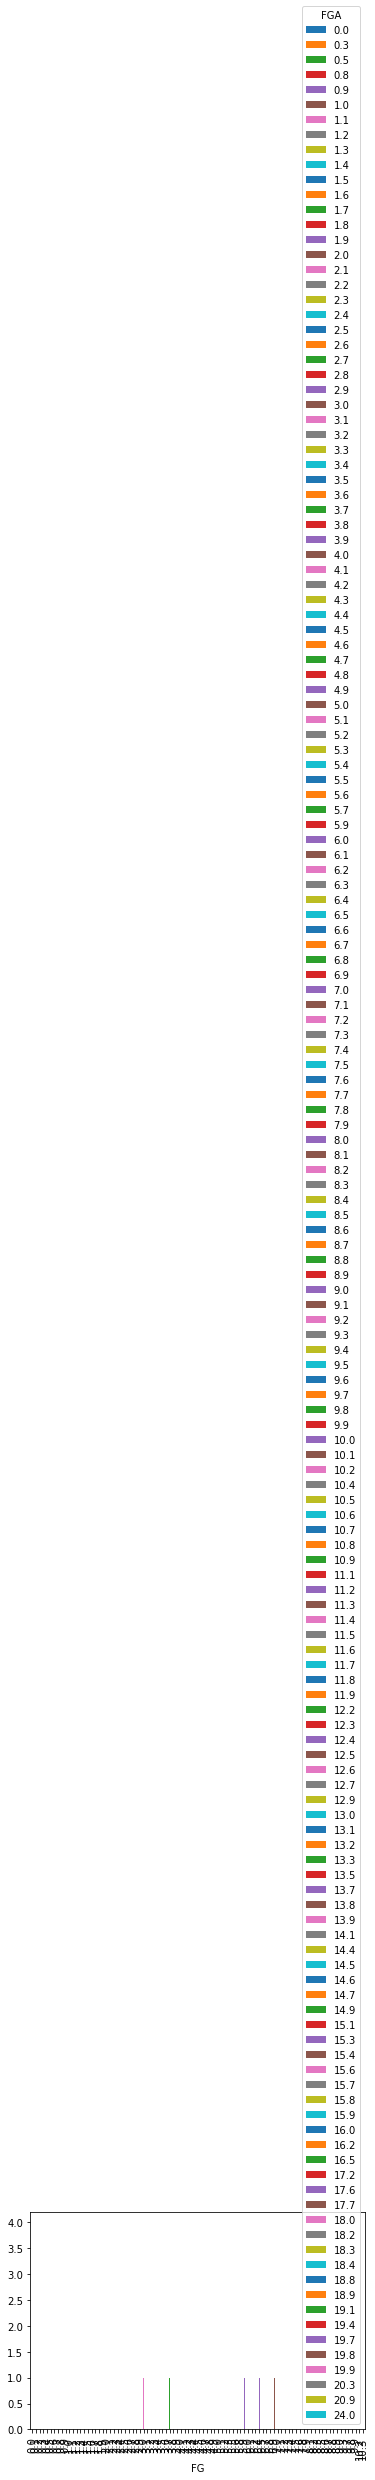

In [5]:
pd.crosstab(Data.FG,Data.FGA).plot(kind='bar')

In [6]:
X = Data.drop(columns = ['Player','Pos','G','MP','FG','FGA'])
y = Data.iloc[ : , 1]
X

,Age,GS
0,28,81
1,27,81
2,27,76
3,23,75
4,27,74
...,...,...
481,22,0
482,21,0
483,23,0
484,23,0


In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([3, 3, 3, 0, 5, 0, 3, 4, 4, 3, 3, 4, 0, 4, 4, 4, 3, 5, 3, 5, 4, 4,
       3, 5, 5, 4, 1, 3, 3, 0, 3, 0, 1, 0, 1, 1, 5, 4, 5, 4, 1, 3, 1, 3,
       3, 5, 1, 5, 0, 3, 0, 5, 5, 1, 5, 5, 4, 3, 3, 3, 5, 5, 5, 1, 5, 4,
       0, 5, 3, 3, 0, 4, 0, 1, 5, 1, 0, 0, 4, 1, 4, 5, 5, 4, 3, 1, 0, 0,
       5, 4, 3, 1, 5, 1, 5, 4, 3, 1, 3, 1, 4, 5, 0, 0, 0, 5, 5, 0, 0, 4,
       0, 0, 0, 1, 3, 3, 4, 5, 3, 4, 3, 1, 3, 4, 1, 0, 1, 5, 5, 4, 1, 5,
       1, 5, 5, 5, 0, 0, 4, 1, 5, 1, 1, 0, 5, 5, 3, 1, 1, 3, 4, 3, 4, 5,
       0, 5, 1, 5, 5, 1, 3, 5, 1, 4, 3, 3, 1, 1, 5, 4, 4, 3, 5, 0, 0, 0,
       5, 4, 4, 0, 4, 4, 1, 1, 4, 4, 0, 0, 5, 5, 5, 5, 0, 5, 5, 5, 0, 4,
       0, 0, 0, 5, 0, 4, 0, 3, 3, 3, 3, 3, 5, 5, 3, 4, 4, 5, 5, 0, 0, 3,
       0, 3, 5, 5, 1, 3, 4, 3, 4, 4, 3, 4, 3, 1, 1, 4, 1, 0, 3, 5, 1, 0,
       1, 1, 5, 1, 5, 4, 3, 3, 0, 4, 4, 3, 4, 0, 4, 5, 4, 1, 1, 4, 5, 1,
       5, 4, 0, 4, 1, 3, 3, 1, 1, 0, 4, 3, 5, 4, 4, 0, 0, 4, 1, 5, 0, 3,
       5, 1, 3, 3, 1, 1, 3, 0, 4, 0, 4, 1, 3, 4, 0,

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 486)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 486)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=486)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([5, 1, 1, 1, 5, 1, 1, 1, 3, 4, 1, 4, 1, 5, 1, 1, 1, 3, 3, 3, 4, 3,
       5, 1, 3, 5, 4, 5, 1, 1, 5, 5, 3, 3, 1, 1, 5, 5, 1, 1, 1, 3, 5, 1,
       1, 3, 4, 1, 5, 5, 1, 3, 5, 1, 1, 4, 5, 5, 1, 5, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 3, 5, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 5, 3, 1, 1, 1,
       5, 1, 1, 1, 3, 1, 1, 1, 1, 1])

In [12]:
classifier.score(X_test,y_test)

0.14285714285714285

In [13]:
# Making the Confusion Matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred)

In [14]:
matrix

array([[ 0, 13,  4,  3,  5],
       [ 0,  6,  3,  0,  5],
       [ 0,  9,  4,  1,  3],
       [ 0, 10,  8,  0,  3],
       [ 0, 14,  1,  2,  4]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.12      0.43      0.18        14
           3       0.20      0.24      0.22        17
           4       0.00      0.00      0.00        21
           5       0.20      0.19      0.20        21

    accuracy                           0.14        98
   macro avg       0.10      0.17      0.12        98
weighted avg       0.09      0.14      0.11        98



C:\Intel\conda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

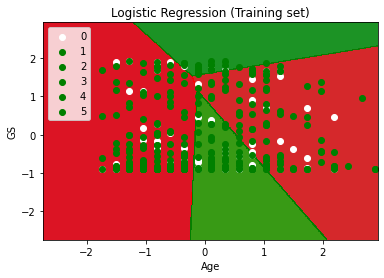

In [17]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('white', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('GS')
plt.legend()
plt.show()

In [18]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

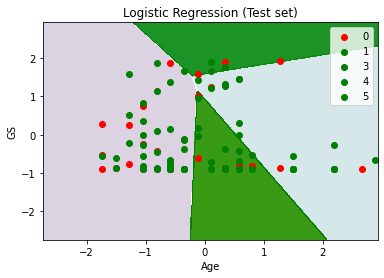

In [19]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
   
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('GS')
plt.legend()
plt.show()